In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Preprocessing

In [484]:
file_path = "../data/raw/Diseases_dataset.csv"

data=pd.read_csv(file_path)

data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [485]:
data['is_labeled'] = 1 
unlabeled_percentage = 0.3

unlabeled_indices = np.random.choice(data.index, size=int(len(data) * unlabeled_percentage), replace=False)


data.loc[unlabeled_indices, 'Disease'] = np.nan

data.loc[unlabeled_indices, 'is_labeled'] = 0
data=data.drop(columns=["Outcome Variable"])

print(data.head())  
modified_path = "../data/processed/Modified_Semi_Supervised_Dataset.csv"
data.to_csv(modified_path, index=False)

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level  is_labeled  
0            Low            Normal           1  
1         Normal            Normal           1  
2         Normal            Normal           1  
3         Normal            Normal           1  
4         Normal            Normal           1  


In [486]:
file_path = "../data/processed/Modified_Semi_Supervised_Dataset.csv"
data = pd.read_csv(file_path)

In [487]:
# symptom_columns = ["Fever", "Cough", "Fatigue", "Difficulty Breathing"]
# for col in symptom_columns:
#     data[col] = data[col].map({"Yes": 1, "No": 0})

# # Create the 'symptoms_sum' column by summing the symptom values row-wise
# data["symptoms_sum"] = data[symptom_columns].sum(axis=1)

# # Save the modified dataset
# data.to_csv(modified_path, index=False)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
data[symptom_columns] = imputer.fit_transform(data[symptom_columns])


In [488]:
# data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Gender', 'Blood Pressure', 'Cholesterol Level'], drop_first=True)


In [489]:
from sklearn.preprocessing import StandardScaler
data['Age'] = StandardScaler().fit_transform(data[['Age']])

# scaler = MinMaxScaler()
# data[['Age', 'symptoms_sum']] = scaler.fit_transform(data[['Age', 'symptoms_sum']])


In [490]:
data.to_csv(modified_path, index=False)

Spliting the Dataset


In [491]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   245 non-null    object 
 1   Fever                     349 non-null    object 
 2   Cough                     349 non-null    object 
 3   Fatigue                   349 non-null    object 
 4   Difficulty Breathing      349 non-null    object 
 5   Age                       349 non-null    float64
 6   is_labeled                349 non-null    int64  
 7   Gender_Male               349 non-null    bool   
 8   Blood Pressure_Low        349 non-null    bool   
 9   Blood Pressure_Normal     349 non-null    bool   
 10  Cholesterol Level_Low     349 non-null    bool   
 11  Cholesterol Level_Normal  349 non-null    bool   
dtypes: bool(5), float64(1), int64(1), object(5)
memory usage: 20.9+ KB
None


In [492]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,is_labeled,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,Yes,No,Yes,Yes,-2.091160,1,False,True,False,False,True
1,Common Cold,No,Yes,Yes,No,-1.631964,1,False,False,True,False,True
2,Eczema,No,Yes,Yes,No,-1.631964,1,False,False,True,False,True
3,Asthma,Yes,Yes,No,Yes,-1.631964,1,True,False,True,False,True
4,Asthma,Yes,Yes,No,Yes,-1.631964,1,True,False,True,False,True


In [493]:
# Convert 'Disease' to a categorical type
data['Disease'] = pd.Categorical(data['Disease'])

# Encode categories as numbers
data['Disease'] = data['Disease'].cat.codes

# Ensure unlabeled rows remain as NaN
data.loc[data['is_labeled'] == 0, 'Disease'] = np.nan


In [494]:
bool_columns = ['Blood Pressure_Low', 'Blood Pressure_Normal', 'Cholesterol Level_Low', 'Cholesterol Level_Normal']
data[bool_columns] = data[bool_columns].astype(int)


In [495]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


In [496]:
bins = [0, 18, 40, 60, 80, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)


In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   245 non-null    float64
 1   Fever                     349 non-null    object 
 2   Cough                     349 non-null    object 
 3   Fatigue                   349 non-null    object 
 4   Difficulty Breathing      349 non-null    object 
 5   Age                       349 non-null    float64
 6   is_labeled                349 non-null    int64  
 7   Gender_Male               349 non-null    bool   
 8   Blood Pressure_Low        349 non-null    int64  
 9   Blood Pressure_Normal     349 non-null    int64  
 10  Cholesterol Level_Low     349 non-null    int64  
 11  Cholesterol Level_Normal  349 non-null    int64  
 12  Age_Group_Young Adult     349 non-null    bool   
 13  Age_Group_Adult           349 non-null    bool   
 14  Age_Group_

In [498]:
binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Convert "Yes"/"No" to 1/0
data[binary_columns] = data[binary_columns].applymap(lambda x: 1 if x == "Yes" else 0)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\1804359920.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_columns] = data[binary_columns].applymap(lambda x: 1 if x == "Yes" else 0)


In [499]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,is_labeled,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Senior,Age_Group_Elderly
0,47.0,1,0,1,1,-2.091160,1,False,1,0,0,1,False,False,False,False
1,18.0,0,1,1,0,-1.631964,1,False,0,1,0,1,False,False,False,False
2,29.0,0,1,1,0,-1.631964,1,False,0,1,0,1,False,False,False,False
3,5.0,1,1,0,1,-1.631964,1,True,0,1,0,1,False,False,False,False
4,5.0,1,1,0,1,-1.631964,1,True,0,1,0,1,False,False,False,False


In [500]:
# Labeled data (for supervised learning)
labeled_data = data[data['is_labeled'] == 1]

# Unlabeled data (for semi-supervised learning)
unlabeled_data = data[data['is_labeled'] == 0]


In [501]:
from sklearn.model_selection import train_test_split

X = labeled_data.drop(columns=['Disease', 'is_labeled'])
y = labeled_data['Disease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [502]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")


Validation Accuracy: 0.10


Label propagation

In [503]:
from sklearn.semi_supervised import LabelPropagation

X_all = data.drop(columns=['Disease', 'is_labeled'])
y_all = data['Disease'].copy()
y_all[data['is_labeled'] == 0] = -1  # Mark unlabeled rows as -1

label_prop_model = LabelPropagation()
label_prop_model.fit(X_all, y_all)

# Get predicted labels for all data
data['Disease'] = label_prop_model.transduction_


In [504]:
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy After Semi-Supervised Learning: {accuracy_score(y_val, y_val_pred):.2f}")


Validation Accuracy After Semi-Supervised Learning: 0.10


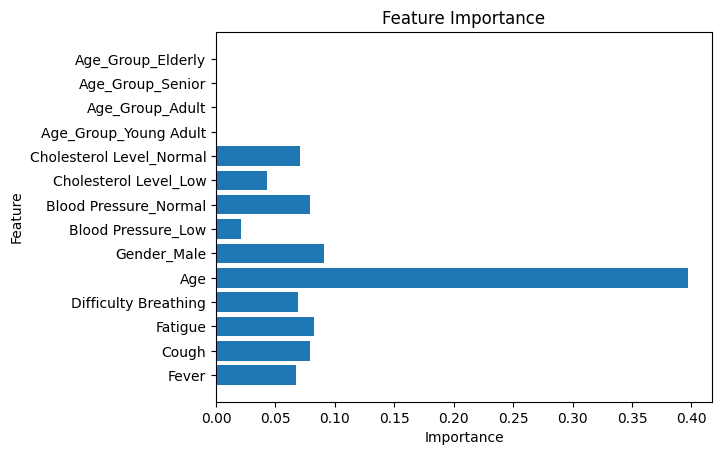

In [505]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


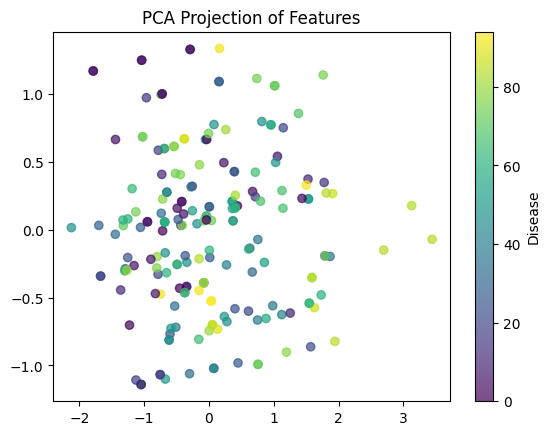

In [506]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Disease')
plt.title('PCA Projection of Features')
plt.show()
